In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [3]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

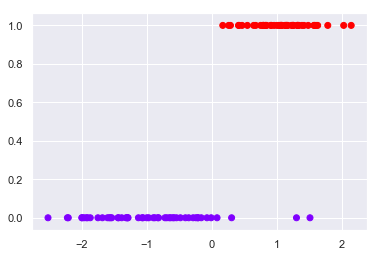

In [4]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [5]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [6]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.70699501]]
[-0.25452844]


In [8]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [9]:
y_pred = lr.predict(x_test)

In [10]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[12,  2],
       [ 0, 11]])

In [11]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.90128081, 0.09871919],
       [0.36349137, 0.63650863],
       [0.02146007, 0.97853993],
       [0.98472315, 0.01527685],
       [0.97787222, 0.02212778],
       [0.99810816, 0.00189184],
       [0.94714638, 0.05285362],
       [0.02736029, 0.97263971],
       [0.05684023, 0.94315977],
       [0.69934007, 0.30065993],
       [0.13151256, 0.86848744],
       [0.03501496, 0.96498504],
       [0.11722656, 0.88277344],
       [0.71599806, 0.28400194],
       [0.9965399 , 0.0034601 ],
       [0.18561511, 0.81438489],
       [0.13361909, 0.86638091],
       [0.95933081, 0.04066919],
       [0.04251116, 0.95748884],
       [0.73904844, 0.26095156],
       [0.03535266, 0.96464734],
       [0.00537175, 0.99462825],
       [0.69711073, 0.30288927],
       [0.82755365, 0.17244635],
       [0.14603024, 0.85396976]])

In [12]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

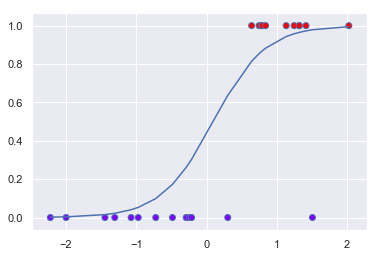

In [13]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [14]:
![title]('pic.png')

/bin/sh: -c: line 0: syntax error near unexpected token `'pic.png''
/bin/sh: -c: line 0: `[title]('pic.png')'
